In [6]:
import pandas as pd
import numpy as np

df_data = pd.read_csv('stellarhosts.csv')
print(df_data)

       Hostname     Temp
0        11 Com      NaN
1        11 Com  4675.18
2      11 Com B  4415.00
3        11 Com  4755.00
4        11 Com  4742.00
...         ...      ...
44390    xi Aql  4780.00
44391    xi Aql      NaN
44392    xi Aql  4805.20
44393    xi Aql      NaN
44394    xi Aql  4841.00

[44395 rows x 2 columns]


In [7]:
df_cleandata = df_data.dropna()
print(df_cleandata)

       Hostname     Temp
1        11 Com  4675.18
2      11 Com B  4415.00
3        11 Com  4755.00
4        11 Com  4742.00
6        11 Com  4874.00
...         ...      ...
44388    xi Aql  4742.00
44389    xi Aql  4707.00
44390    xi Aql  4780.00
44392    xi Aql  4805.20
44394    xi Aql  4841.00

[36348 rows x 2 columns]


In [8]:
def remove_outliers(df_cleandata):
    numeric_cols = df_cleandata.select_dtypes(include=['number'])
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_numeric = df_cleandata[(numeric_cols >= lower_bound) & (numeric_cols <= upper_bound)]
    non_numeric_cols = df_cleandata.select_dtypes(exclude=['number'])
    return pd.concat([filtered_numeric, non_numeric_cols], axis=1)

df_cleanerdata = remove_outliers(df_cleandata)

print(df_cleanerdata)
#This code was ran, there are no outliers in our data (same number of rows), so we will continue using df_cleandata.

      Hostname     Temp  Hostname
1          NaN  4675.18    11 Com
2          NaN  4415.00  11 Com B
3          NaN  4755.00    11 Com
4          NaN  4742.00    11 Com
6          NaN  4874.00    11 Com
...        ...      ...       ...
44388      NaN  4742.00    xi Aql
44389      NaN  4707.00    xi Aql
44390      NaN  4780.00    xi Aql
44392      NaN  4805.20    xi Aql
44394      NaN  4841.00    xi Aql

[36348 rows x 3 columns]


In [9]:
grouped = df_cleandata.groupby('Hostname')
df_final_data = grouped.mean()
df_final_data.reset_index(inplace = True)
print(df_final_data)

       Hostname         Temp
0        11 Com  4763.530000
1      11 Com B  4415.000000
2        11 UMi  4264.094000
3        14 And  4777.576667
4        14 Her  5335.994000
...         ...          ...
4158    tau Gem  4426.110000
4159    ups And  6153.808889
4160  ups And B  3159.000000
4161    ups Leo  4877.500000
4162     xi Aql  4764.866667

[4163 rows x 2 columns]


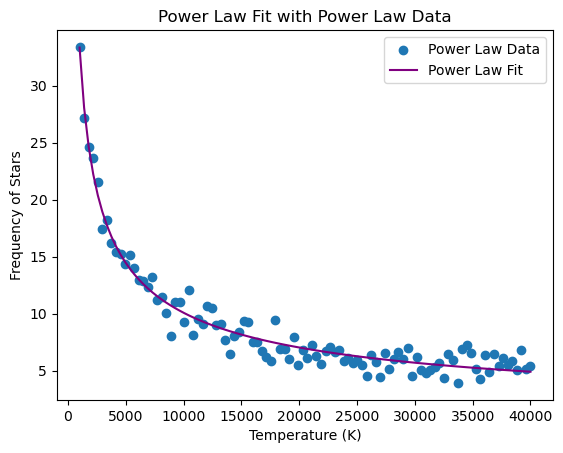

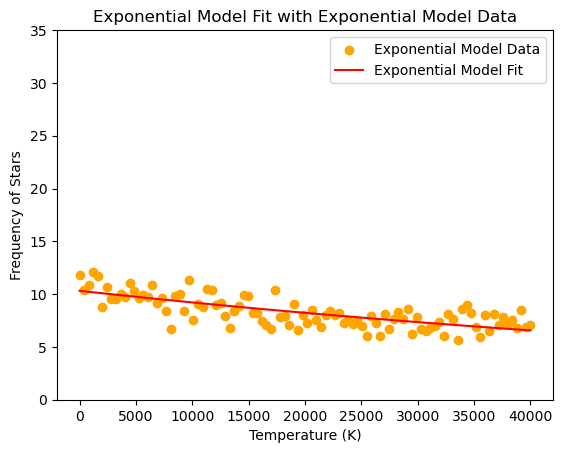

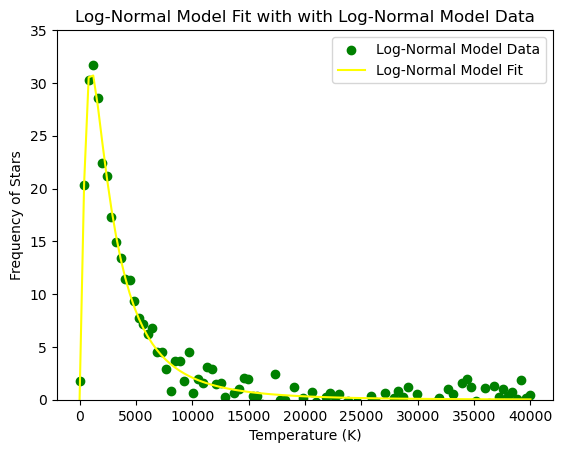

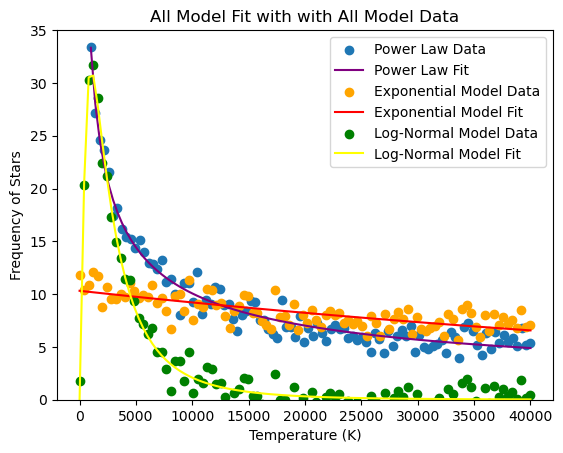

In [11]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def power_law(x, a, b):
    return a * np.power(x, b)

x_data = np.linspace(1000, 40000, 100)  
a_true = 1000
b_true = -0.5
y_data = power_law(x_data, a_true, b_true)

np.random.seed(0) 
y_data_noise = y_data + np.random.normal(scale = 1, size= x_data.shape)

params, covariance = curve_fit(power_law, x_data, y_data_noise)

a_fit, b_fit = params

y_data_fit = power_law(x_data, a_fit, b_fit)

plt.scatter(x_data, y_data_noise, label = 'Power Law Data')
plt.plot(x_data, y_data_fit, color = 'purple', label = 'Power Law Fit')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency of Stars')
plt.title('Power Law Fit with Power Law Data')
plt.legend()
plt.show()

def exponential(x, c, d):
    return c * np.exp(-d * x)

x_data2 = np.linspace(1, 40000, 100)  
c_true = 10
d_true = 0.00001
y_data2 = exponential(x_data2, c_true, d_true)

np.random.seed(0)  
y_data2_noise = y_data2 + np.random.normal(scale = 1, size = x_data2.shape)

params, covariance = curve_fit(exponential, x_data2, y_data2_noise, p0=[10, 0.00001])

y_data2_fit = exponential(x_data2, *params)

plt.scatter(x_data2, y_data2_noise, color = 'orange', label = 'Exponential Model Data')
plt.plot(x_data2, y_data2_fit, color = 'red', label = 'Exponential Model Fit')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency of Stars')
plt.title('Exponential Model Fit with Exponential Model Data')
plt.ylim(0, 35)
plt.legend()
plt.show()


def log_normal(x, e, f, g):
    return g * np.exp(-(np.log(x) - e)**2 / (2 * f**2))

x_data3 = np.linspace(1, 40000, 100) 

e_true = np.log(1000) 
f_true = 1.0 
g_true = 30  
y_data3 = log_normal(x_data2, e_true, f_true, g_true)

np.random.seed(0)  
y_data3_noise = y_data3 + np.random.normal(scale = 1, size = x_data3.shape)

params, covariance = curve_fit(log_normal, x_data3, y_data3_noise, p0 = [e_true, f_true, g_true])
e_fit, f_fit, g_fit = params

y_data3_fit = log_normal(x_data3, e_fit, f_fit, g_fit)

plt.scatter(x_data3, y_data3_noise, color = 'green', label = 'Log-Normal Model Data')
plt.plot(x_data3, y_data3_fit, color = 'yellow', label = 'Log-Normal Model Fit')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency of Stars')
plt.title('Log-Normal Model Fit with with Log-Normal Model Data')
plt.ylim(0, 35)
plt.legend()
plt.show()

plt.scatter(x_data, y_data_noise, label = 'Power Law Data')
plt.plot(x_data, y_data_fit, color = 'purple', label = 'Power Law Fit')
plt.scatter(x_data2, y_data2_noise, color = 'orange', label = 'Exponential Model Data')
plt.plot(x_data2, y_data2_fit, color = 'red', label = 'Exponential Model Fit')
plt.scatter(x_data3, y_data3_noise, color = 'green', label = 'Log-Normal Model Data')
plt.plot(x_data3, y_data3_fit, color = 'yellow', label = 'Log-Normal Model Fit')
plt.xlabel('Temperature (K)')
plt.ylabel('Frequency of Stars')
plt.title('All Model Fit with with All Model Data')
plt.ylim(0, 35)
plt.legend()
plt.show()

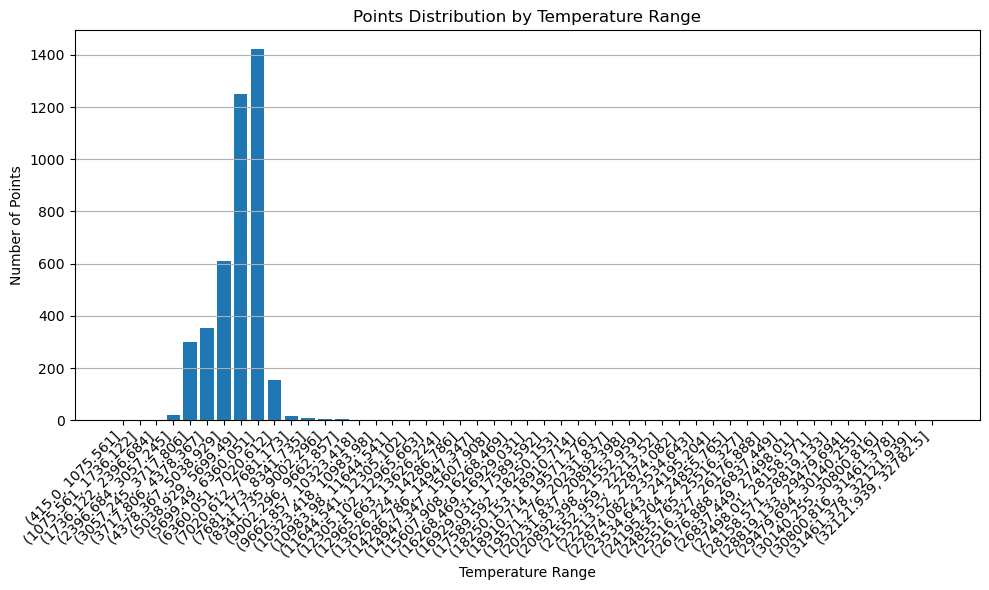

In [12]:
temperature_ranges = np.linspace(df_final_data['Temp'].min(), df_final_data['Temp'].max(), 50) 

df_final_data['temperature_range'] = pd.cut(df_final_data['Temp'], temperature_ranges)
counts = df_final_data['temperature_range'].value_counts(sort=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(counts)), counts, tick_label=[str(r) for r in counts.index], width=0.8)  # Adjust width as needed
plt.xlabel('Temperature Range')
plt.ylabel('Number of Points')
plt.title('Points Distribution by Temperature Range')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


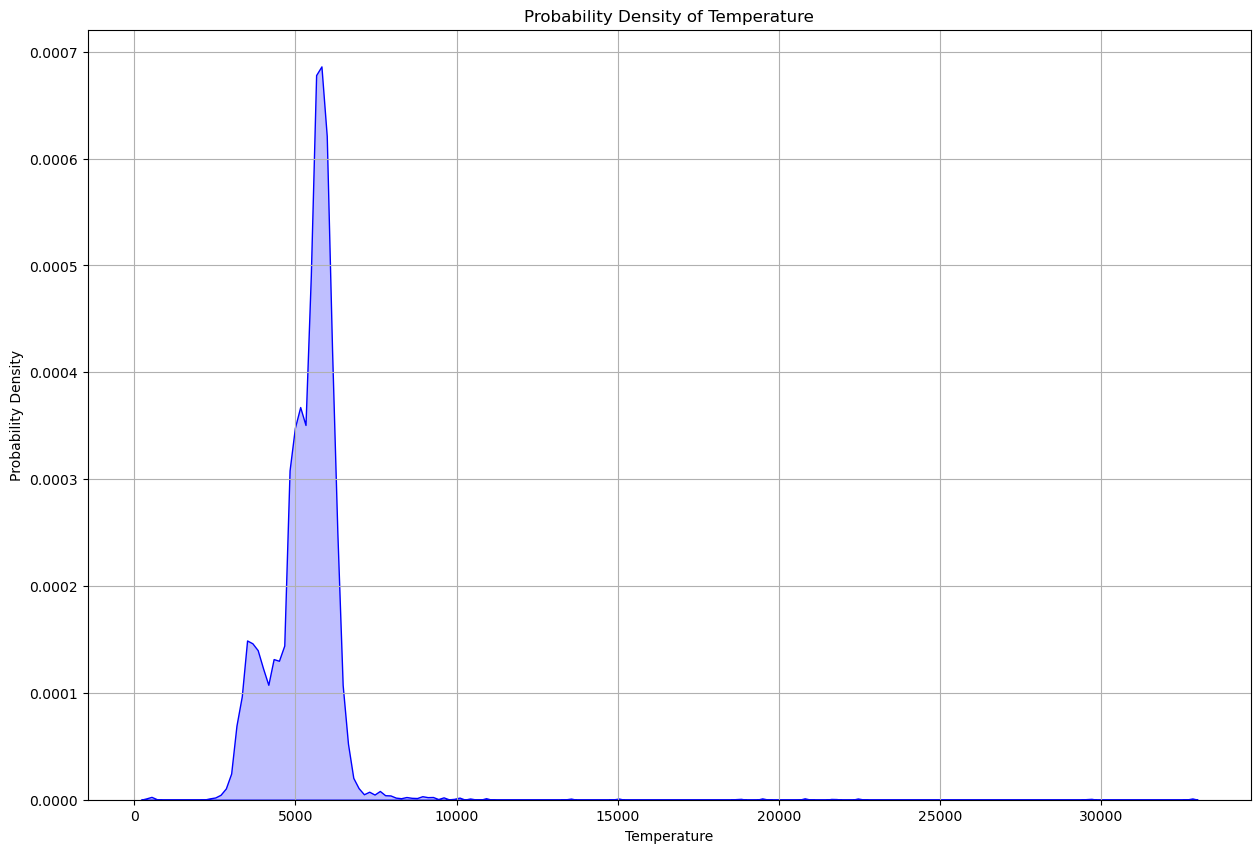

In [13]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.kdeplot(df_final_data['Temp'], fill=True, color="b", bw_adjust=0.3)
plt.xlabel('Temperature')
plt.ylabel('Probability Density')
plt.title('Probability Density of Temperature')
plt.grid(True)
plt.show()

In [21]:
def categorize_data(Temp):
    spectral_type_ranges = {'M': (-float('inf'), 3500), 'K': (3500, 5000), 'G': (5000, 6000), 'F': (6000, 7500), 'A': (7500, 10000), 'O': (10000, float('inf'))}
    for spectral_type, (min_temp, max_temp) in spectral_type_ranges.items():
        if min_temp <= Temp < max_temp:
            return spectral_type
    return 'Unknown'

df_final_data['Type'] = df_final_data['Temp'].apply(categorize_data)
df_final_data= df_final_data.drop(columns=['temperature_range'])

print(df_final_data)

       Hostname         Temp Type
0        11 Com  4763.530000    K
1      11 Com B  4415.000000    K
2        11 UMi  4264.094000    K
3        14 And  4777.576667    K
4        14 Her  5335.994000    G
...         ...          ...  ...
4158    tau Gem  4426.110000    K
4159    ups And  6153.808889    F
4160  ups And B  3159.000000    M
4161    ups Leo  4877.500000    K
4162     xi Aql  4764.866667    K

[4163 rows x 3 columns]


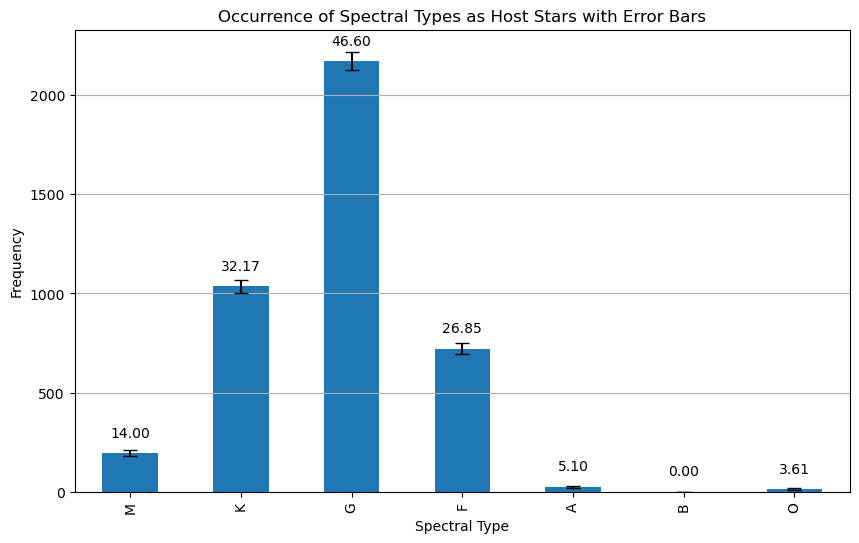

In [24]:
amount_of_type = df_final_data['Type'].value_counts()
order_of_type = ['M', 'K', 'G', 'F', 'A', 'B', 'O']
ordered_types = amount_of_type.reindex(order_of_type, fill_value=0)

errors = np.sqrt(ordered_types)

plt.figure(figsize=(10, 6))
ordered_types.plot(kind = 'bar', yerr = errors, capsize = 5)
plt.title('Occurrence of Spectral Types as Host Stars with Error Bars')
plt.xlabel('Spectral Type')
plt.ylabel('Frequency')
plt.grid(axis = 'y')
for i, value in enumerate(errors):
    height = ordered_types[i] + 0.03 * ordered_types.max()
    plt.annotate(f'{value:.2f}', xy=(i, height), ha='center', va='bottom')
plt.show()

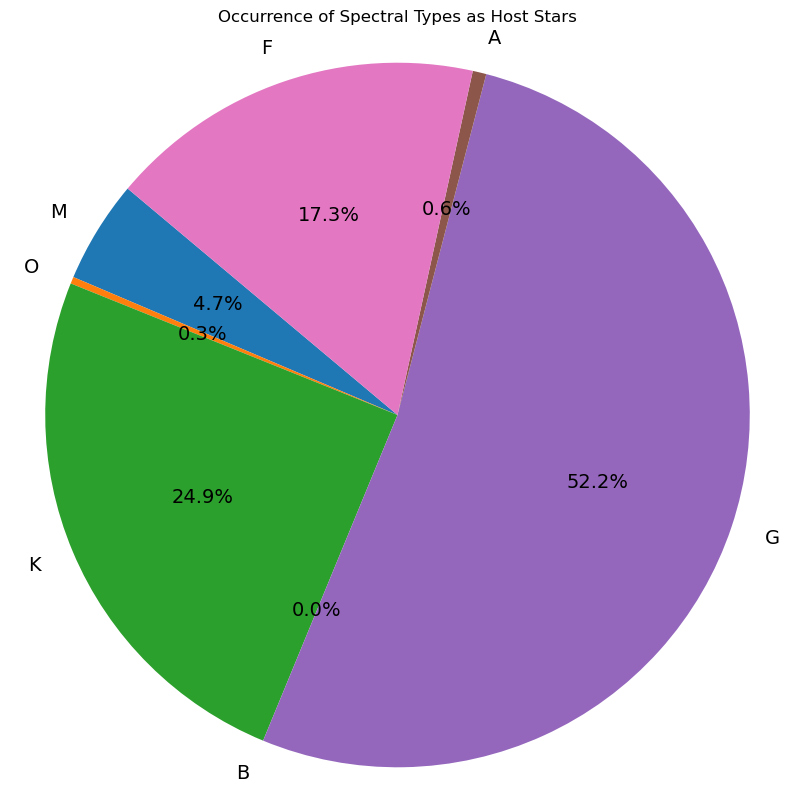

In [23]:
new_order_of_type = ['M', 'O', 'K', 'B', 'G', 'A', 'F']
new_ordered_types = ordered_types.reindex(new_order_of_type, fill_value=0)

plt.figure(figsize=(10, 10))
plt.pie(new_ordered_types, labels = new_ordered_types.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Occurrence of Spectral Types as Host Stars')
plt.axis('equal')
plt.show()